In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import re
import string

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")


In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake["label"] = "FAKE"
df_true["label"] = "TRUE"
df_true.head(5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [6]:
df_fake.shape, df_true.shape


((23481, 5), (21417, 5))

In [37]:
df_fake_manual_testing = df_fake.tail(10)  #TO DO
for i in range(23481,23481,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21417,21417,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [40]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("dataset_manual_testing.csv")

In [41]:
k=pd.read_csv("dataset_manual_testing.csv")


In [44]:
k.head(10)



,Unnamed: 0,title,text,subject,date,label
0,23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",FAKE
1,23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",FAKE
2,23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",FAKE
3,23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",FAKE
4,23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",FAKE
5,23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",FAKE
6,23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",FAKE
7,23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",FAKE
8,23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",FAKE
9,23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",FAKE


In [7]:
df_combine = pd.concat([df_fake, df_true], axis =0 )
df_combine.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",FAKE
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",FAKE
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",FAKE
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",FAKE
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",FAKE


In [8]:
df_combine.columns


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [9]:
df = df_combine.drop(["text", "subject","date"], axis = 1)
df.head()

,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,FAKE


In [10]:
df.isnull().sum()

title    0
label    0
dtype: int64

In [11]:
df = df.sample(frac = 1)  
print(df)

                                                   title label
1410    Trump Wants Flynn Back, Says Special Counsel ...  FAKE
2057   Exclusive: Trump's Afghan decision may increas...  TRUE
8654   Alaska's top court rejects parental notice for...  TRUE
16993  BIG BROTHER: IRS Using Secret Cellphone Tracki...  FAKE
18638  Saudi authorities pursue Twitter user over wom...  TRUE
...                                                  ...   ...
2665   U.S. says China acknowledged goal of reducing ...  TRUE
4253    Woman Who Defended GOP Against Sexism Charges...  FAKE
5575    WATCH: Fox News Host And Trump Supporter Call...  FAKE
2855   Factbox: Trump on Twitter (July 9) - G20, Puti...  TRUE
12472  BILL CLINTON RECENTLY CAUGHT Making Racist Rem...  FAKE

[44898 rows x 2 columns]


In [12]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
print(df)

                                                   title label
0       Trump Wants Flynn Back, Says Special Counsel ...  FAKE
1      Exclusive: Trump's Afghan decision may increas...  TRUE
2      Alaska's top court rejects parental notice for...  TRUE
3      BIG BROTHER: IRS Using Secret Cellphone Tracki...  FAKE
4      Saudi authorities pursue Twitter user over wom...  TRUE
...                                                  ...   ...
44893  U.S. says China acknowledged goal of reducing ...  TRUE
44894   Woman Who Defended GOP Against Sexism Charges...  FAKE
44895   WATCH: Fox News Host And Trump Supporter Call...  FAKE
44896  Factbox: Trump on Twitter (July 9) - G20, Puti...  TRUE
44897  BILL CLINTON RECENTLY CAUGHT Making Racist Rem...  FAKE

[44898 rows x 2 columns]


In [13]:
def removeRegularExp(text): #regular expression
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text) #remove fullstop
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [14]:

df["title"] = df["title"].apply(removeRegularExp)


In [15]:
x = df["title"]
y = df["label"]
print(x)

0         trump wants flynn back  says special counsel ...
1        exclusive  trump s afghan decision may increas...
2        alaska s top court rejects parental notice for...
3        big brother  irs using secret cellphone tracki...
4        saudi authorities pursue twitter user over wom...
                               ...                        
44893    u s  says china acknowledged goal of reducing ...
44894     woman who defended gop against sexism charges...
44895     watch  fox news host and trump supporter call...
44896    factbox  trump on twitter  july       putin  s...
44897    bill clinton recently caught making racist rem...
Name: title, Length: 44898, dtype: object


<AxesSubplot:>

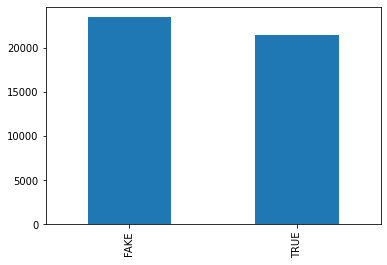

In [16]:
df['label'].value_counts().plot(kind = 'bar')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0) 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train) #total terms: nXn matrix  
xv_test = vectorization.transform(x_test)

In [20]:
y_train.head()

13637    FAKE
42421    FAKE
37916    FAKE
3321     FAKE
2345     TRUE
Name: label, dtype: object

In [21]:
from sklearn.linear_model import LogisticRegression



In [22]:
Lr=LogisticRegression()
Lr.fit(xv_train,y_train)


LogisticRegression()

In [23]:
predic_Lr=Lr.predict(xv_test)

In [24]:
accuracy = Lr.score(xv_test, y_test)
print(accuracy*100)

95.0467706013363


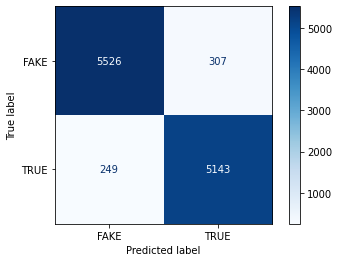

In [25]:
disp = plot_confusion_matrix(Lr, xv_test, y_test, cmap = 'Blues', values_format='d')

In [26]:
from sklearn.naive_bayes import MultinomialNB


Nb = MultinomialNB()
Nb.fit(xv_train, y_train)
accuracy = Nb.score(xv_test, y_test)

print(accuracy*100)

93.88864142538975


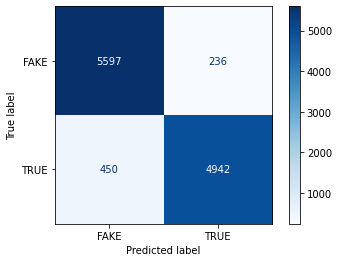

In [27]:
dis = plot_confusion_matrix(Nb, xv_test, y_test, cmap = 'Blues', values_format='d')

In [28]:
from sklearn.tree import DecisionTreeClassifier


Dt = DecisionTreeClassifier()
Dt.fit(xv_train, y_train)
accuracy = Dt.score(xv_test, y_test)

print(accuracy*100)

90.99331848552339


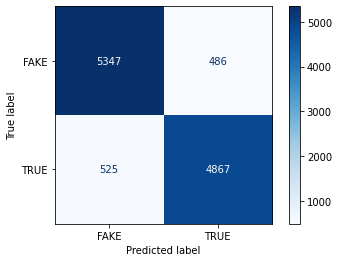

In [29]:
dis = plot_confusion_matrix(Dt, xv_test, y_test, cmap = 'Blues', values_format='d')

In [30]:
# PASSIVE-AGGRESSIVE CLASSIFIER

from sklearn.metrics import accuracy_score

from sklearn.linear_model import PassiveAggressiveClassifier

#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(xv_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(xv_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy*100)

94.94877505567929


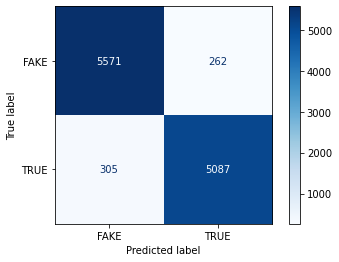

In [31]:
dis = plot_confusion_matrix(pac, xv_test, y_test, cmap = 'Blues', values_format='d')

In [32]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(random_state=0)
Rfc.fit(xv_train, y_train)
predict_Rfc = Rfc.predict(xv_test)
accuracy = Rfc.score(xv_test, y_test)

print(accuracy*100)

95.08240534521158


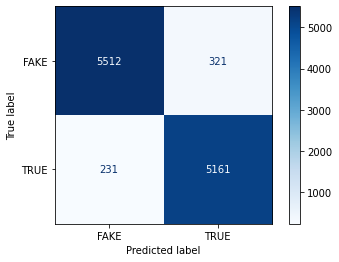

In [33]:
dis = plot_confusion_matrix(Rfc, xv_test, y_test, cmap = 'Blues', values_format='d')

In [34]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(xv_train,y_train)
y_pred=clf.predict(xv_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy*100)

95.87527839643653


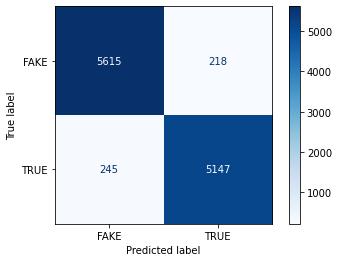

In [35]:
dis = plot_confusion_matrix(clf, xv_test, y_test, cmap = 'Blues', values_format='d')

In [36]:
import pickle

with open("modal",'wb') as f:
    pickle.dump(clf,f)